In [ ]:
import matplotlib.pylab as plt
import numpy as np
from mgemu import emu
import pyccl

In [43]:
def pmg(Om, h, ns, s8, fR0, n, z):
    Omh2 = (h**2)*Om
    pkratio, k = emu(Omh2, ns, s8, fR0, n, z)
    # cosmo = pyccl.Cosmology(Omega_c= Om, Omega_b=0.0, h=h, n_s=ns, sigma8=s8, transfer_function='bbks')
    cosmo = pyccl.Cosmology(Omega_c=Om, Omega_b=0.0223/(h**2), h=h, sigma8=s8, n_s=ns, Neff=3.04, transfer_function='boltzmann_class', matter_power_spectrum='emu')
    a = 1./(1+z)
    pk_nl = pyccl.nonlin_matter_power(cosmo, k, a)
    pk_mg = pk_lcdm*pkratio
    return pk_mg, k

In [44]:
### LCDM parameters
h=0.67 # See README and the accompanying paper regarding the value of h. 
Om = 0.281
Omh2=(h**2)*Om
ns=0.971
s8=0.82
### Hu-Sawicki model parameters
fr0=1e-5
n=1
### Redshift
z=0.0

In [45]:
pkratio, k = emu(Omh2=Omh2, ns=ns, s8=s8, fR0=fr0, n=n, z=z)

In [46]:
# cosmo = pyccl.Cosmology(Omega_c= Om, Omega_b=0.0, h=h, n_s=ns, sigma8=s8, transfer_function='bbks')
cosmo = pyccl.Cosmology(Omega_c=Om, Omega_b=0.0223/(h**2), h=h, sigma8=s8, n_s=ns, Neff=3.04, transfer_function='bbks', matter_power_spectrum='emu')
# pyccl.comoving_radial_distance(cosmo, 1./(1+z))
a = 1./(1+z)
pk_lcdm = pyccl.nonlin_matter_power(cosmo, k, a)

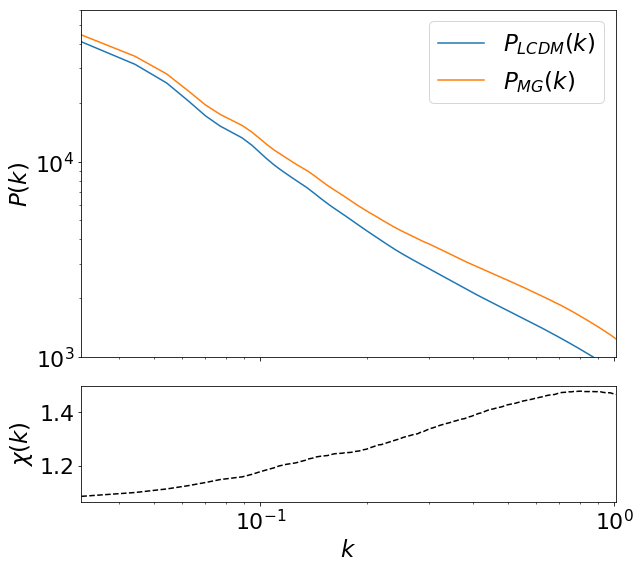

In [77]:
f, a = plt.subplots(2, 1, figsize=(9, 8), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)
a[0].tick_params(axis='both', which='major', labelsize=22)
a[1].tick_params(axis='both', which='major', labelsize=22)


a[0].plot(k, pk_lcdm, label = r'$P_{LCDM}(k)$')
a[0].set_xscale('log')
a[1].set_xscale('log')

a[0].set_yscale('log')
a[0].plot(k, pk_lcdm*pkratio, label = r'$P_{MG}(k)$')
a[0].set_ylabel(r'$P(k)$' , fontsize=23)
a[0].legend(fontsize=23)


a[1].set_xlabel('$k$' , fontsize=23)
a[1].plot(k, pkratio, 'k--', label = r'$P_{MG}(k)/P_{LCDM}(k)$')
a[1].set_ylabel(r'$\chi(k)$' , fontsize=23)

a[0].set_xlim(0, 1.01)
a[1].set_xlim(0, 1.01)
a[0].set_ylim(1e3, )

f.tight_layout()

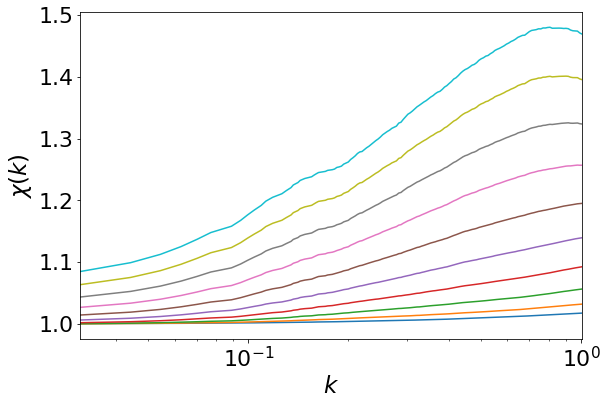

In [63]:
import matplotlib.pylab as plt
import numpy as np

plt.figure(1, figsize=(9, 6) )
plt.tick_params(axis='both', which='major', labelsize=22)

fR0_arr= np.logspace(-6, -4, 10)
for i in range(10):
    fR0 = fR0_arr[i]
    pkratio, k = emu(Omh2=Omh2, ns=ns, s8=s8, fR0=fR0, n=n, z=z)
    plt.plot(k, pkratio)
plt.xscale('log')
plt.ylabel(r'$\chi(k)$', fontsize=23)
plt.xlabel(r'$k$', fontsize=23)
plt.xlim(0, 1.01)
plt.show()

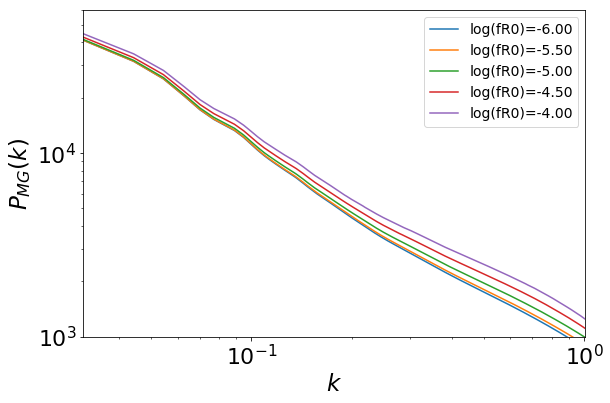

In [75]:

import matplotlib.pylab as plt
import numpy as np

plt.figure(1, figsize=(9, 6) )
plt.tick_params(axis='both', which='major', labelsize=22)
fR0_arr= np.logspace(-6, -4, 5)
for i in range(5):
    fR0 = fR0_arr[i]
    p_mg, k = pmg(Om, h, ns, s8, fR0, n, z)
    plt.plot(k, p_mg, label = "log(fR0)={:.2f}".format(np.log10(fR0)) )
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$P_{MG}(k)$', fontsize=23)
plt.xlabel(r'$k$', fontsize=23)
plt.legend(fontsize=14)
plt.xlim(0, 1.01)
plt.ylim(1e3,)


plt.show()